In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [91]:
L = np.random.binomial(1,0.5,1000)  
A=6*L + np.random.normal(0,1,1000)
B=np.empty([1000,])
#This wrong as B is dependent on L 
B[L==1]=-3*(A[L==1]-6)*(A[L==1]-6)+np.random.normal(0,1,len(A[L==1]))+10
B[L==0]=3*(A[L==0])*(A[L==0])+np.random.normal(0,1,len(A[L==0]))-24
#B=3*np.sin(A)+ np.random.normal(0,1,1000)
#B[L==0]=1*(A[L==0])*(A[L==0])+np.random.normal(0,1,len(L[L==0]))-5

Text(0, 0.5, 'B')

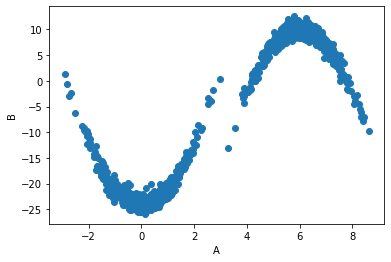

In [92]:
plt.scatter(A,B)
plt.xlabel("A")
plt.ylabel("B")

In [3]:
#checking the values which are different in cit and in nlmr
book=pd.read_csv("NLMRresultupdateddiffvar.csv")

In [4]:
book.head()

,Unnamed: 0,parameters,p_cit,p_TassocL,p_TassocGgvnL,p_GassocLgvnT,p_LindTgvnG,CIT_final_call,Unnamed: 8,p_L->A,p_L->B,"diff(B|A,B|A,L)",final_call
0,0,-5_6_0.5_2,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,,,0.0,0.0,0.49,
1,1,-5_6_0.5_3,1.000000,1.212108e-231,0.000000e+00,0.000000e+00,1.000000,,,0.0,0.0,0.05,
2,2,-5_6_1_2,0.999708,0.000000e+00,4.996284e-287,7.188586e-318,0.999708,,,0.0,0.0,0.30,
3,3,-5_6_1_3,1.000000,1.703102e-245,0.000000e+00,0.000000e+00,1.000000,,,0.0,0.0,0.00,causal
4,4,-5_5_0.5_2,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,,,0.0,0.0,0.02,causal


In [18]:
C_cit=[] #causal in cit but not in nlmr
C_nlmr=[] #causal in nlmr but not in cit
C_both=[] #both called it causal
C_none=[] #both called it non causal
for i, row in book.iterrows():
    if row['CIT_final_call']=='causal' and row["final_call"] == ' ' :
        C_cit.append(i)
    elif row['CIT_final_call']==' ' and row['final_call']=='causal':
        C_nlmr.append(i)
    elif row['CIT_final_call']=='causal' and row['final_call']=='causal':
        C_both.append(i)
    elif row['CIT_final_call']==' ' and row['final_call']==' ':
        C_none.append(i)

print(len(C_cit))
print(len(C_nlmr))
print(len(C_both))
print(len(C_none))

20
24
8
48


In [19]:
with open('CITCausal_notNLMR.pkl', 'wb') as f:
    pickle.dump(C_cit, f)

In [20]:
with open('CITnot_CausalNLMR.pkl', 'wb') as f:
    pickle.dump(C_nlmr, f)

In [22]:
with open('Causalboth.pkl', 'wb') as f:
    pickle.dump(C_both, f)

In [23]:
with open('CausalNone.pkl', 'wb') as f:
    pickle.dump(C_none, f)